In [16]:
import geopandas as gpd
import pandas as pd
import numpy as np
from ast import literal_eval
from shapely.geometry import Polygon
CSV_PATH = "/home/zhimin90/CPT/CSVs/"

In [17]:
pd.reset_option("display.max_columns", 50)

In [18]:
pwd

'/home/zhimin90/CPT/Chicago_Pothole_Tracker_Pub/modeling'

In [19]:
df = pd.read_csv(CSV_PATH + "2020-03-21_frames_all", index_col=0, converters={"poly_coordinate": literal_eval})

In [20]:
df.head(10)

,start_date,end_date,poly_coordinate,density
0,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97726, 41.60687], [-87.97676558558558, 4...",-7.368972e-17
1,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97676558558558, 41.60687], [-87.97627117...",-7.069238e-17
2,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97627117117118, 41.60687], [-87.97577675...",-7.553285e-17
3,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97577675675676, 41.60687], [-87.97528234...",-7.229394e-17
4,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97528234234234, 41.60687], [-87.97478792...",-7.495127e-17
5,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97478792792793, 41.60687], [-87.97429351...",-7.826177e-17
6,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97429351351352, 41.60687], [-87.97379909...",-7.910282e-17
7,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.9737990990991, 41.60687], [-87.973304684...",-7.401182e-17
8,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97330468468469, 41.60687], [-87.97281027...",-7.726861e-17
9,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97281027027027, 41.60687], [-87.97231585...",-7.477234e-17


In [21]:
df["int_density"] = df.density.astype(int)
df.head(10)


,start_date,end_date,poly_coordinate,density,int_density
0,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97726, 41.60687], [-87.97676558558558, 4...",-7.368972e-17,0
1,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97676558558558, 41.60687], [-87.97627117...",-7.069238e-17,0
2,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97627117117118, 41.60687], [-87.97577675...",-7.553285e-17,0
3,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97577675675676, 41.60687], [-87.97528234...",-7.229394e-17,0
4,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97528234234234, 41.60687], [-87.97478792...",-7.495127e-17,0
5,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97478792792793, 41.60687], [-87.97429351...",-7.826177e-17,0
6,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97429351351352, 41.60687], [-87.97379909...",-7.910282e-17,0
7,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.9737990990991, 41.60687], [-87.973304684...",-7.401182e-17,0
8,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97330468468469, 41.60687], [-87.97281027...",-7.726861e-17,0
9,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97281027027027, 41.60687], [-87.97231585...",-7.477234e-17,0


In [36]:
type(df.iloc[0,2])

list

In [22]:
list = []
for index, row in df.iterrows():
    list.append( [row['start_date'],  row['end_date'],Polygon( row['poly_coordinate']), row['density'], row['int_density']] )

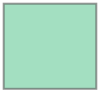

In [23]:
list[0][2]

In [24]:
gdf = gpd.GeoDataFrame(list, columns =['start_date','end_date', 'geometry', 'density', 'int_density'])

In [25]:
gdf.bounds

,minx,miny,maxx,maxy
0,-87.977260,41.60687,-87.976766,41.607324
1,-87.976766,41.60687,-87.976271,41.607324
2,-87.976271,41.60687,-87.975777,41.607324
3,-87.975777,41.60687,-87.975282,41.607324
4,-87.975282,41.60687,-87.974788,41.607324
...,...,...,...,...
999995,-87.485318,42.06083,-87.484823,42.061284
999996,-87.484823,42.06083,-87.484329,42.061284
999997,-87.484329,42.06083,-87.483834,42.061284
999998,-87.483834,42.06083,-87.483340,42.061284


In [26]:
gdf.total_bounds

array([-87.97726   ,  41.60687   , -87.48284559,  42.06128441])

In [27]:
xmin, ymin, xmax, ymax = gdf.total_bounds

In [70]:
grid_size = 4
xgrid = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ygrid = np.arange(ymin, ymax, (ymax-ymin)/grid_size)

In [71]:
print(xgrid,ygrid)

[-87.97726    -87.8536564  -87.73005279 -87.60644919] [41.60687    41.7204736  41.83407721 41.94768081]


In [72]:
c = 0
gdf["zone"] = None
for row in xgrid:
    for col in ygrid:
        boundbox = Polygon([[row,col],[row+(xmax-xmin)/grid_size,col],[row+(xmax-xmin)/grid_size,col+(ymax-ymin)/grid_size],[row,col+(ymax-ymin)/grid_size],[row,col]])
        bb_df = gpd.GeoSeries(boundbox)
        bool_within_bb = gdf.geometry.intersects(boundbox)
        index_within_bb = gdf[bool_within_bb].index
        gdf.iloc[index_within_bb,5] = c
        c+=1
        print(c)
        print("count rows within count" + str(len(index_within_bb)))
        print("-"*25)

1
count rows within count63001
-------------------------
2
count rows within count63001
-------------------------
3
count rows within count63001
-------------------------
4
count rows within count62750
-------------------------
5
count rows within count63252
-------------------------
6
count rows within count63252
-------------------------
7
count rows within count63252
-------------------------
8
count rows within count63000
-------------------------
9
count rows within count63001
-------------------------
10
count rows within count63001
-------------------------
11
count rows within count63001
-------------------------
12
count rows within count62750
-------------------------
13
count rows within count62750
-------------------------
14
count rows within count62750
-------------------------
15
count rows within count62750
-------------------------
16
count rows within count62500
-------------------------


In [73]:
gdf["zone"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: zone, Length: 1000000, dtype: bool

In [74]:
gdf[gdf["zone"].isnull()].count()

start_date     0
end_date       0
geometry       0
density        0
int_density    0
zone           0
dtype: int64

In [78]:
#c = 0
#gdf["zone"] = None
#for row in xgrid:
#    for col in ygrid:
#        #print(row,col)
#        current_index = gdf.cx[row:row+(xmax-xmin)/grid_size, col:col+(ymax-ymin)/grid_size].index
#        gdf.iloc[current_index,5] = c
#        c+=1

In [ ]:
sum(gdf["zone"].notna())

In [ ]:
gdf[gdf["zone"].notna()]

In [75]:
gdf_dissolved = gdf.dissolve(by=['int_density','zone'])

In [76]:
gdf_dissolved

,,geometry,start_date,end_date,density
int_density,zone,,,,
-30,11,"POLYGON ((-87.64205 41.96813, -87.64155 41.968...",2020-02-25 15:26:27,2020-03-26 15:07:10,-30.081804
-29,11,"POLYGON ((-87.64155 41.96813, -87.64106 41.968...",2020-02-25 15:26:27,2020-03-26 15:07:10,-29.200430
-26,11,"POLYGON ((-87.64155 41.96858, -87.64205 41.968...",2020-02-25 15:26:27,2020-03-26 15:07:10,-26.299114
-25,11,"POLYGON ((-87.64106 41.96813, -87.64056 41.968...",2020-02-25 15:26:27,2020-03-26 15:07:10,-25.253798
-23,11,"POLYGON ((-87.64155 41.96904, -87.64106 41.969...",2020-02-25 15:26:27,2020-03-26 15:07:10,-23.235737
...,...,...,...,...,...
252,9,"MULTIPOLYGON (((-87.72214 41.74547, -87.72165 ...",2020-02-25 15:26:27,2020-03-26 15:07:10,252.343231
255,9,"POLYGON ((-87.72264 41.74638, -87.72214 41.746...",2020-02-25 15:26:27,2020-03-26 15:07:10,255.555878
265,9,"POLYGON ((-87.72214 41.74592, -87.72165 41.745...",2020-02-25 15:26:27,2020-03-26 15:07:10,265.838867


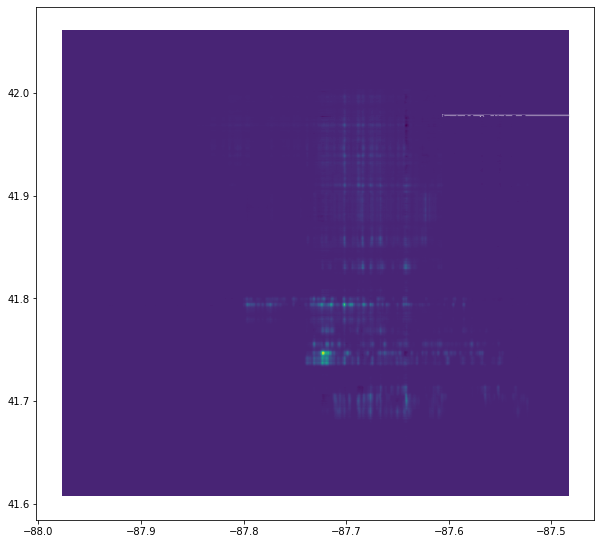

In [77]:
gdf_dissolved[["geometry","density"]].plot(column='density',figsize=(10,10))

In [ ]:
gdf_dissolved.to_file("2017-11-11_4_test.geojson", driver='GeoJSON')